<a href="https://colab.research.google.com/github/UN-GCPDS/curso_IA_CHEC/blob/main/Modulo1/cuadernos/Modulo_1_Sesion_2_Graficas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

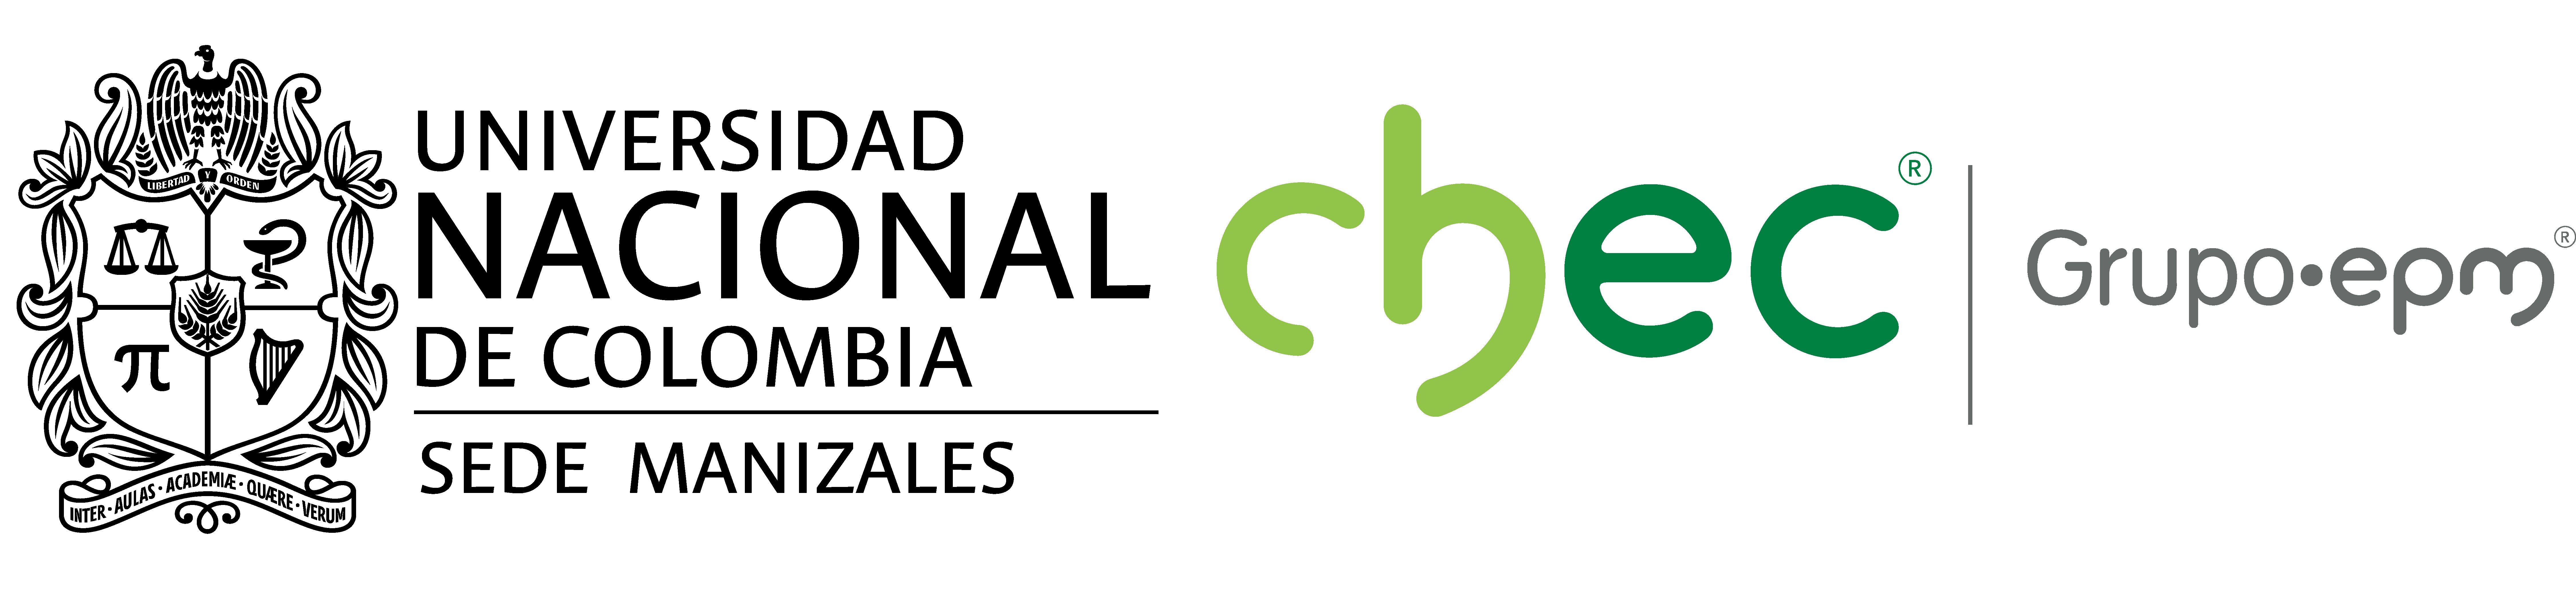

# **MÓDULO 1: PROGRAMACIÓN Y ESTADÍSTICA BÁSICA**

## **Descripción**

En este módulo se abordarán los principios de programación para el manejo de datos desde Python. Además, se estudiarán algunas herramientas para el análisis exploratorio de datos como apoyo a la toma de decisiones informadas.

### **Profesor - Sesión 1 y 2:** Andrés Marino Álvarez Meza

### **Monitores - Sesión 1 y 2:** Danna Valentina Salazar Dubois, Juan Camilo Lugo Rojas y Lucas Miguel Iturriago Salas

### Configuración del entorno de trabajo

#### Descarga de las bases de datos

In [1]:
!git clone https://github.com/UN-GCPDS/curso_IA_CHEC.git # Copiar el respositorio de GitHub del curso

Cloning into 'curso_IA_CHEC'...
remote: Enumerating objects: 827, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 827 (delta 47), reused 25 (delta 13), pack-reused 753 (from 1)
Receiving objects: 100% (827/827), 30.26 MiB | 6.23 MiB/s, done.
Resolving deltas: 100% (539/539), done.
Updating files: 100% (20/20), done.


In [2]:
# Cambiar el directorio donde situan las bases de datos
%cd /content/curso_IA_CHEC

/content/curso_IA_CHEC


#### Importar las bibliotecas de Python a usar

In [60]:
# @title
# Visualización y gráficos
import seaborn as sns
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Manipulación de datos y análisis
import numpy as np
import pandas as pd
import geopandas as gpd

# Widgets interactivos
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display, HTML, clear_output

# Utilidades de geometría y mapas
import folium
from shapely import wkt
from shapely.geometry import Point, LineString


# Fechas y tiempos
from datetime import datetime

# Otras utilidades
import random

# **Módulo 1: Programación y Estadística Básica con Python**

**Sesión 2**: En este módulo aprenderemos a visualizar datos usando Matplotlib, Seaborn y Plotly, utilizando un dataset del consumo de energía.
Nos enfocaremos en las técnicas fundamentales para explorar el dataset mediante visualizaciones, como histogramas, gráficos de densidad, scatters, gráficos de pastel, boxplots, diagramas de violín y geopandas. Exploraremos cómo cada una de estas bibliotecas nos permite analizar y comprender mejor la distribución y relaciones entre las variables clave.

### Cargamos la base de datos, de los consumos de energía, contenida en el archivo csv

In [49]:
consumption = pd.read_csv('Modulo1/databases/powerconsumption.csv')  # Cargar dataset

In [ ]:
# @title
@interact(x=(0, 100, 1))
def actualizar(x=5):
    display(consumption.head(x))

interactive(children=(IntSlider(value=5, description='x'), Output()), _dom_classes=('widget-interact',))

In [105]:
# @title
# Seleccionar las variables que son float
float_columns = consumption.select_dtypes(include=['float'])

# Crear un nuevo DataFrame para almacenar los valores agrupados en 10 rangos
consumption_rangos = pd.DataFrame()

# Aplicar pd.cut para crear 20 rangos automáticos por cada columna flotante
for col in float_columns.columns:
    consumption_rangos[col] = pd.cut(consumption[col], bins=10, labels=False)  # Asigna un número de rango del 0 al 9

# Seleccionar las variables que son float
float_columns = consumption.select_dtypes(include=['float'])

# Crear un nuevo DataFrame para almacenar los valores agrupados en 10 rangos
consumption_rangos_1 = pd.DataFrame()

# Aplicar pd.cut para crear 20 rangos automáticos por cada columna flotante
for col in float_columns.columns:
    consumption_rangos_1[col] = pd.cut(consumption[col], bins=10)  # Asigna un número de rango del 0 al 9

## **Histograma**

Un histograma sirve para visualizar la distribución de datos al mostrar la frecuencia de valores en intervalos o rangos específicos.
La expresión matemática completa para un histograma es:

$$
H(x) = \sum_{i=1}^{n} \mathbf{1}_{[x_i, x_{i+1})}(x) f_i
$$

Donde:
- $ H(x) $ es la función del histograma.
- $ [x_i, x_{i+1}) $ es el intervalo del i-ésimo bin.
- $ f_i $ es la frecuencia (o conteo) de los valores dentro del bin $ [x_i, x_{i+1}) $.
- $ \mathbf{1}_{[x_i, x_{i+1})}(x) $ es la función indicadora, que es 1 si $ x \in [x_i, x_{i+1}) $, y 0 en caso contrario.

Al graficar usando Matplotlib, el primer argumento que recibe la función `plt.hist` es la variable a la cual queremos graficar el histograma, y con el parámetro `bins` escogemos el número de barras, para este ejemplo seleccionamos los primeros 10000 datos

In [6]:
# @title
def matplotlib_histograma(column_name,bins):
  plt.hist(consumption[column_name].head(10000), bins=bins, color='blue', edgecolor='black') # Se selecciona la variable y la cantidad de bins
  plt.title(f'Histograma del {column_name}') # Se añade un titulo
  plt.xlabel(f'{column_name}') # Nombre para el eje x
  plt.ylabel('Frecuencia') # Nombre para el eje y
  plt.show()

# Crear el dropdown para seleccionar la columna
column_dropdown = widgets.Dropdown(
    options=consumption.columns.tolist()[1:],  # Lista de nombres de columnas
    value=consumption.columns[1],  # Valor inicial (segunda columna, por ejemplo)
    description='Columna:',
)

# Crear un slider para el número de bins
bins_slider = widgets.IntSlider(
    value=30,
    min=10,
    max=100,
    step=5,
    description='Bins:',
    continuous_update=False
)
# Mostrar el widget y la gráfica interactiva
widgets.interactive(matplotlib_histograma, column_name=column_dropdown, bins=bins_slider)

interactive(children=(Dropdown(description='Columna:', options=('Temperature', 'Humidity', 'WindSpeed', 'Gener…

Al graficar usando Plotly, el primer argumento que recibe la función `px.histogram` es la variable a la cual queremos graficar el histograma, y con el parámetro `bins` escogemos el número de barras, para este ejemplo seleccionamos los primeros 10000 datos

In [7]:
# @title
# Variables globales para almacenar los valores seleccionados
selected_bins = bins_slider.value
selected_column = column_dropdown.value

# Crear un slider para ajustar el número de bins
bins_slider = widgets.IntSlider(
    value=30,   # Valor inicial
    min=10,     # Valor mínimo
    max=100,    # Valor máximo
    step=5,     # Paso
    description='Bins:',
    continuous_update=False
)

# Crear un dropdown para seleccionar la columna
column_dropdown = widgets.Dropdown(
    options=consumption.columns.tolist()[1:],  # Lista de nombres de columnas
    value=consumption.columns[1],  # Valor inicial (la primera columna, por ejemplo)
    description='Columna:',
)

# Función para capturar los valores seleccionados y limpiar la salida anterior
def on_value_change(change):
    global selected_bins, selected_column  # Permitir modificar las variables globales

    # Limpiar la salida anterior
    clear_output(wait=True)

    # Actualizar los valores seleccionados
    selected_bins = bins_slider.value
    selected_column = column_dropdown.value

    # Mostrar los widgets actualizados
    display(bins_slider)
    display(column_dropdown)

# Asociar el cambio de valor a la función
bins_slider.observe(on_value_change, names='value')
column_dropdown.observe(on_value_change, names='value')

# Mostrar los widgets inicialmente
display(bins_slider)
display(column_dropdown)

IntSlider(value=30, continuous_update=False, description='Bins:', min=10, step=5)

Dropdown(description='Columna:', options=('Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'Diff…

In [8]:
# @title
# Histograma de median_house_value con Plotly
fig = px.histogram(consumption.head(10000), x=selected_column, nbins=selected_bins, title=f'Histograma de {selected_column}')
fig.update_layout(xaxis_title=f'{selected_column}', yaxis_title='Frecuencia')
fig.show()

## **PDF y KDE (Densidad de Probabilidad Kernel)**

La **estimación de densidad kernel (KDE)** es una técnica para estimar la función de densidad de probabilidad de una variable aleatoria continua, para visualizar la distribución subyacente de datos.
La expresión matemática completa para la KDE se da como:

$$
\hat{f}(x) = \frac{1}{n h} \sum_{i=1}^{n} K\left( \frac{x - x_i}{h} \right)
$$

Donde:
- $ \hat{f}(x) $ es la estimación de la densidad en el punto $ x $.
- $ n $ es el número total de datos en la muestra.
- $ h > 0 $ es el **parámetro de suavizado** o **ancho de banda**, que controla el nivel de suavizado de la curva. Si $ h $ es pequeño, la estimación será más ajustada a los datos, mientras que un $ h $ grande proporciona una curva más suave.
- $ x_i $ son los datos observados, es decir, los puntos de la muestra.
- $ K(\cdot) $ es la **función kernel**, que es una función simétrica y suavizante que determina la forma de la distribución alrededor de cada punto de datos $ x_i $. Algunas kernels comunes incluyen:
  - **Kernel Gaussiano**:
    $$
    K(u) = \frac{1}{\sqrt{2\pi}} e^{-\frac{u^2}{2}}
    $$

Al graficar con Matplotlib y Seaborn, el primer argumento que recibe la función `sns.histplot` es la la variable a la cual queremos graficar el histograma y el parámetro `kde=True`, activa la visualización del KDE, para este ejemplo seleccionamos los primeros 10000 datos


In [9]:
# @title
# KDE con histograma
def matplotlib_KDE(column_name,bins):
  sns.histplot(consumption[column_name].head(10000), kde=True, color='blue', bins=bins)
  plt.title(f'Histograma y KDE de {column_name}')
  plt.xlabel(column_name)
  plt.ylabel('Densidad/Frecuencia')
  plt.show()

# Crear el dropdown para seleccionar la columna
column_dropdown = widgets.Dropdown(
    options=consumption.columns.tolist()[1:],  # Lista de nombres de columnas
    value=consumption.columns[1],  # Valor inicial (segunda columna, por ejemplo)
    description='Columna:',
)

# Crear un slider para el número de bins
bins_slider = widgets.IntSlider(
    value=30,
    min=10,
    max=100,
    step=5,
    description='Bins:',
    continuous_update=False
)
# Mostrar el widget y la gráfica interactiva
widgets.interactive(matplotlib_KDE, column_name=column_dropdown, bins=bins_slider)

interactive(children=(Dropdown(description='Columna:', options=('Temperature', 'Humidity', 'WindSpeed', 'Gener…

Al graficar con Plotly y Seaborn, el primer argumento que recibe la función `sns.histplot` es la la variable a la cual queremos graficar el histograma y el parámetro `kde=True`, activa la visualización del KDE, para este ejemplo seleccionamos los primeros 10000 datos

In [10]:
# @title
# Variables globales para almacenar los valores seleccionados
selected_column = column_dropdown.value

# Crear un dropdown para seleccionar la columna
column_dropdown = widgets.Dropdown(
    options=consumption.columns.tolist()[1:],  # Lista de nombres de columnas
    value=consumption.columns[1],  # Valor inicial (la primera columna, por ejemplo)
    description='Columna:',
)

# Función para capturar los valores seleccionados y limpiar la salida anterior
def on_value_change(change):
    global selected_bins, selected_column  # Permitir modificar las variables globales

    # Limpiar la salida anterior
    clear_output(wait=True)

    # Actualizar los valores seleccionados
    selected_column = column_dropdown.value

    # Mostrar los widgets actualizados
    display(column_dropdown)

# Asociar el cambio de valor a la función
column_dropdown.observe(on_value_change, names='value')

# Mostrar los widgets inicialmente
display(column_dropdown)

Dropdown(description='Columna:', options=('Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'Diff…

In [11]:
# @title
# Calcular KDE usando Seaborn
kde = sns.kdeplot(consumption[selected_column].head(10000), bw_adjust=1).get_lines()[0].get_data()

# Cerrar la figura de Seaborn para evitar que se muestre
plt.close()

# Gráfico interactivo con Plotly
fig = go.Figure()

# Agregar KDE
fig.add_trace(go.Scatter(x=kde[0], y=kde[1], mode='lines', name='KDE', line=dict(color='firebrick')))

fig.update_layout(title=f'KDE de {selected_column}', xaxis_title=f'{selected_column}', yaxis_title='Densidad')
fig.show()

Se crea un gráfico de densidad 2D con distribuciones marginales para visualizar la relación entre dos columnas del DataFrame, junto con un gráfico de dispersión para diferentes categorías, para los primeros 300 datos

In [112]:
# @title
# Crear un dropdown para seleccionar la primera columna
column_dropdown_1 = widgets.Dropdown(
    options=consumption.columns.tolist()[1:],  # Lista de nombres de columnas, excluyendo la primera columna si es irrelevante
    value=consumption.columns[1],  # Valor inicial (la segunda columna, por ejemplo)
    description='Columna 1:',
)

# Crear un dropdown para seleccionar la segunda columna
column_dropdown_2 = widgets.Dropdown(
    options=consumption.columns.tolist()[1:],  # Lista de nombres de columnas, excluyendo la primera columna si es irrelevante
    value=consumption.columns[2],  # Valor inicial (la tercera columna, por ejemplo)
    description='Columna 2:',
)

# Crear un dropdown para seleccionar la tercera columna
column_dropdown_3 = widgets.Dropdown(
    options=consumption.columns.tolist()[1:],  # Lista de nombres de columnas, excluyendo la primera columna si es irrelevante
    value=consumption.columns[4],  # Valor inicial (la cuarta columna, por ejemplo)
    description='Columna 3:',
)

# Variables globales para almacenar los valores seleccionados
selected_column_1 = column_dropdown_1.value
selected_column_2 = column_dropdown_2.value
selected_column_3 = column_dropdown_3.value

# Función para capturar los valores seleccionados y limpiar la salida anterior
def on_value_change(change):
    global selected_column_1, selected_column_2, selected_column_3  # Permitir modificar las variables globales

    # Limpiar la salida anterior
    clear_output(wait=True)

    # Actualizar los valores seleccionados
    selected_column_1 = column_dropdown_1.value
    selected_column_2 = column_dropdown_2.value
    selected_column_3 = column_dropdown_3.value

    # Mostrar los widgets actualizados
    display(column_dropdown_1)
    display(column_dropdown_2)
    display(column_dropdown_3)

# Asociar el cambio de valor a la función
column_dropdown_1.observe(on_value_change, names='value')
column_dropdown_2.observe(on_value_change, names='value')
column_dropdown_3.observe(on_value_change, names='value')

# Mostrar los widgets inicialmente
display(column_dropdown_1)
display(column_dropdown_2)
display(column_dropdown_3)

Dropdown(description='Columna 1:', options=('Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'Di…

Dropdown(description='Columna 2:', index=1, options=('Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFl…

Dropdown(description='Columna 3:', index=3, options=('Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFl…

<ipython-input-110-398a616a294b>:22: UserWarning:

KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.

<ipython-input-110-398a616a294b>:42: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



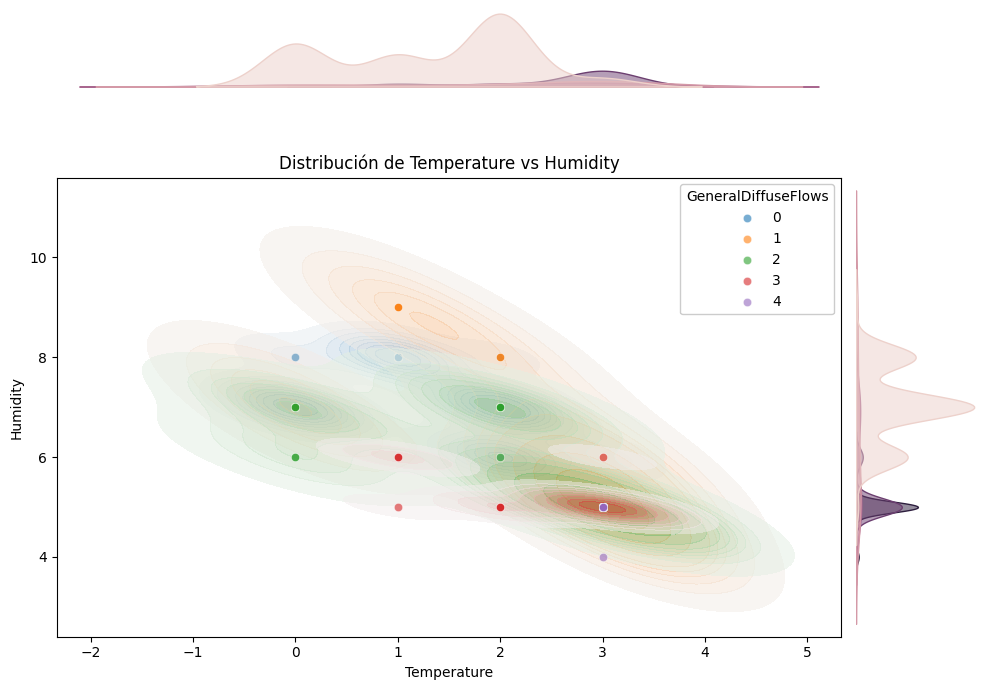

In [110]:
# @title
# Crear la figura y ajustar el tamaño total
fig = plt.figure(figsize=(10, 7))  # Cambiar el tamaño total de la figura (más ancho y alto)
gs = fig.add_gridspec(3, 3, width_ratios=[3, 0.1, 0.5], height_ratios=[0.5, 0.1, 3])  # Ajustar el tamaño relativo

# Crear los ejes para el gráfico principal y las distribuciones marginales
ax_main = fig.add_subplot(gs[2:, :-1])  # Gráfico principal
ax_right = fig.add_subplot(gs[2:, -1], sharey=ax_main)  # Distribución marginal derecha
ax_top = fig.add_subplot(gs[0, :-1], sharex=ax_main)  # Distribución marginal superior

# Definir las tres columnas del DataFrame para graficar
col_x = selected_column_1  # Reemplaza con la opción escogida 1
col_y = selected_column_2  # Reemplaza con la opción escogida 2
col_hue = selected_column_3  # Reemplaza con la opción escogida 3

# Seleccionar los primeros 100 datos
data_subset = consumption_rangos.head(300)

# Crear el gráfico de densidad 2D y el scatter plot para cada categoría en 'col_hue'
for category, color in zip(data_subset[col_hue].unique(), sns.color_palette()):
    subset = data_subset[data_subset[col_hue] == category]
    sns.kdeplot(
        data=subset,
        x=col_x,
        y=col_y,
        fill=True,
        cmap=sns.light_palette(color, as_cmap=True),
        alpha=0.5,
        ax=ax_main
    )
    sns.scatterplot(
        data=subset,
        x=col_x,
        y=col_y,
        alpha=0.6,
        color=color,
        ax=ax_main,
        label=category
    )

# Agregar las distribuciones marginales con ajustes en tamaño
sns.kdeplot(data=data_subset, x=col_x, hue=col_hue, fill=True, alpha=0.5, ax=ax_top, legend=False)
sns.kdeplot(data=data_subset, y=col_y, hue=col_hue, fill=True, alpha=0.5, ax=ax_right, legend=False)

# Apagar los ejes de las distribuciones marginales
ax_top.axis("off")
ax_right.axis("off")

# Personalizar el gráfico principal
ax_main.set_xlabel(f"{col_x}")
ax_main.set_ylabel(f"{col_y}")
ax_main.set_title(f"Distribución de {col_x} vs {col_y}")

# Ajustar la leyenda dentro del gráfico principal
ax_main.legend(title=col_hue, loc='upper right', framealpha=1.0)

# Ajustar el diseño y mostrar
plt.tight_layout()
plt.show()

## **Scatter**

Un scatter plot muestra la relación entre dos variables numéricas al representar cada punto de datos con coordenadas en un gráfico de dispersión.

Al graficar usando Matplotlib, los dos primeros argumentos que recibe la función `plt.scatter` son las variables a la cuales queremos graficar el scatter, para este ejemplo seleccionamos los primeros 10000 datos

In [22]:
# @title
def matplotlib_scatter(column_name_1, column_name_2):
  # Crear el gráfico de dispersión
  plt.figure(figsize=(8, 6))
  plt.scatter(consumption[column_name_1].head(10000), consumption[column_name_2].head(10000), color='blue', alpha=0.5)

  # Agregar títulos y etiquetas
  plt.title(f'Scatter Plot: {column_name_1} vs. {column_name_2}')
  plt.xlabel(f'{column_name_1}')
  plt.ylabel(f'{column_name_2}')

  # Mostrar el gráfico
  plt.show()

# Crear el dropdown para seleccionar la columna (variable 1)
column_dropdown_1 = widgets.Dropdown(
    options=consumption.columns.tolist()[1:],  # Lista de nombres de columnas
    value=consumption.columns[1],  # Valor inicial (segunda columna, por ejemplo)
    description='Columna: 1',
)

# Crear el dropdown para seleccionar la columna (variable 2)
column_dropdown_2 = widgets.Dropdown(
    options=consumption.columns.tolist()[1:],  # Lista de nombres de columnas
    value=consumption.columns[1],  # Valor inicial (segunda columna, por ejemplo)
    description='Columna: 2',
)

# Mostrar el widget y la gráfica interactiva
widgets.interactive(matplotlib_scatter, column_name_1=column_dropdown_1, column_name_2=column_dropdown_2)

interactive(children=(Dropdown(description='Columna: 1', options=('Temperature', 'Humidity', 'WindSpeed', 'Gen…

Al graficar usando Matplotlib, los dos primeros argumentos que recibe la función `go.Scatter` son las variables a la cuales queremos graficar el scatter, para este ejemplo seleccionamos los primeros 10000 datos

In [ ]:
# @title
# Crear un dropdown para seleccionar la primera columna
column_dropdown_1 = widgets.Dropdown(
    options=consumption.columns.tolist()[1:],  # Lista de nombres de columnas, excluyendo la primera columna si es irrelevante
    value=consumption.columns[1],  # Valor inicial (la segunda columna, por ejemplo)
    description='Columna 1:',
)

# Crear un dropdown para seleccionar la segunda columna
column_dropdown_2 = widgets.Dropdown(
    options=consumption.columns.tolist()[1:],  # Lista de nombres de columnas, excluyendo la primera columna si es irrelevante
    value=consumption.columns[2],  # Valor inicial (la tercera columna, por ejemplo)
    description='Columna 2:',
)

# Variables globales para almacenar los valores seleccionados
selected_column_1 = column_dropdown_1.value
selected_column_2 = column_dropdown_2.value

# Función para capturar los valores seleccionados y limpiar la salida anterior
def on_value_change(change):
    global selected_column_1, selected_column_2  # Permitir modificar las variables globales

    # Limpiar la salida anterior
    clear_output(wait=True)

    # Actualizar los valores seleccionados
    selected_column_1 = column_dropdown_1.value
    selected_column_2 = column_dropdown_2.value

    # Mostrar los widgets actualizados
    display(column_dropdown_1)
    display(column_dropdown_2)

# Asociar el cambio de valor a la función
column_dropdown_1.observe(on_value_change, names='value')
column_dropdown_2.observe(on_value_change, names='value')

# Mostrar los widgets inicialmente
display(column_dropdown_1)
display(column_dropdown_2)

Dropdown(description='Columna 1:', options=('Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'Di…

Dropdown(description='Columna 2:', index=1, options=('Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFl…

In [ ]:
# @title
# Crear el gráfico de dispersión interactivo con Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=consumption[selected_column_1].head(10000),
    y=consumption[selected_column_2].head(10000),
    mode='markers',
    marker=dict(color='blue', opacity=0.6),
    name=f'{selected_column_1} vs {selected_column_2}'
))

# Configurar el layout
fig.update_layout(
    title=f'Scatter Plot: {selected_column_1} vs. {selected_column_2}',
    xaxis_title=f'{selected_column_1}',
    yaxis_title=f'{selected_column_2}',
    height=600,
    width=800
)

# Mostrar el gráfico
fig.show()

## **Diagrama de pastel**

Un diagrama de pastel (o gráfico circular) representa la proporción de un conjunto de categorías respecto al total. Cada categoría se visualiza como un "sector" del círculo, cuyo tamaño es proporcional a la frecuencia o porcentaje de esa categoría

$$
\theta_i = \frac{n_i}{N} \cdot 360^\circ
$$

Donde:
- $ \theta_i $ es el ángulo del sector correspondiente a la categoría $ i $ en grados.
- $ n_i $ es el número de ocurrencias (frecuencia) de la categoría $ i $.
- $ N $ es el número total de ocurrencias, es decir, $ N = \sum_{i} n_i $.
- $ 360^\circ $ representa la circunferencia total del círculo.

- Cada ángulo $ \theta_i $ se calcula dividiendo la frecuencia de una categoría $ n_i $ por el total $ N $ para obtener la proporción, y luego se multiplica por 360° para obtener el tamaño del sector en grados.
- Los sectores en el diagrama de pastel suman $ 360^\circ $, ya que representan la totalidad del conjunto de datos.

En `consumption_counts` se selecciona la variable a realizar el diagrama de pastel, esto seleccionado la columna del Dataframe `consumption`, y en el primer argumento de la función `plt.pie` de Matplotlib se pasa el conteo de las categorías, para este ejemplo seleccionamos los primeros 10000 datos

In [113]:
# @title
def matplotlib_pastel(column_name):
    # Cuenta el número de ocurrencias por categoría
    consumption_counts = consumption_rangos_1[column_name].head(10000).value_counts()

    n = len(consumption_counts)  # Cambiado de unique() a len()

    # Genera una paleta de colores con n colores
    colores = ['#{:06x}'.format(random.randint(0, 0xFFFFFF)) for _ in range(n)]

    # Crear gráfico de pastel sin etiquetas ni porcentajes
    fig, ax = plt.subplots(figsize=(10, 6))  # Aumentado el tamaño de la figura
    wedges, _ = ax.pie(
        consumption_counts,
        startangle=90,
        colors=colores  # Cambiado de 'next' a 'colores'
    )

    # Calcular los porcentajes manualmente
    total = consumption_counts.sum()
    legend_labels = [f'{label} - {count} ({100 * count / total:.1f}%)' for label, count in zip(consumption_counts.index, consumption_counts)]

    # Crear la leyenda con los porcentajes
    ax.legend(
        handles=[patches.Patch(color=color) for color in colores],
        labels=legend_labels,
        loc='center left',
        bbox_to_anchor=(1, 0.5),
        title=column_name  # Añadido título a la leyenda
    )

    plt.title(f'Distribución de los primeros 10,000 registros de {column_name}')
    plt.tight_layout()  # Ajusta automáticamente el diseño
    plt.show()

# Crear el dropdown para seleccionar la columna (variable 1)
column_dropdown = widgets.Dropdown(
    options=consumption_rangos_1.columns.tolist()[1:],  # Lista de nombres de columnas
    value=consumption_rangos_1.columns[4],  # Valor inicial (cuarta columna)
    description='Columna:',
)

# Mostrar el widget y la gráfica interactiva
interactive_plot = widgets.interactive(matplotlib_pastel, column_name=column_dropdown)
display(interactive_plot)

interactive(children=(Dropdown(description='Columna:', index=3, options=('Humidity', 'WindSpeed', 'GeneralDiff…

En `consumption_counts` se selecciona la variable a realizar el diagrama de pastel, esto seleccionado la columna del Dataframe `consumption`, y en el primer argumento de la función `px.pie` de Plotly se pasa el conteo de las categorías, para este ejemplo seleccionamos los primeros 10000 datos

In [114]:
# @title
# Crear un dropdown para seleccionar la primera columna
column_dropdown = widgets.Dropdown(
    options=consumption.columns.tolist()[1:],  # Lista de nombres de columnas, excluyendo la primera columna si es irrelevante
    value=consumption.columns[4],  # Valor inicial (la segunda columna, por ejemplo)
    description='Columna:',
)

# Variables globales para almacenar los valores seleccionados
selected_column = column_dropdown.value

# Función para capturar los valores seleccionados y limpiar la salida anterior
def on_value_change(change):
    global selected_column  # Permitir modificar las variables globales

    # Limpiar la salida anterior
    clear_output(wait=True)

    # Actualizar los valores seleccionados
    selected_column = column_dropdown.value

    # Mostrar los widgets actualizados
    display(column_dropdown)

# Asociar el cambio de valor a la función
column_dropdown.observe(on_value_change, names='value')

# Mostrar los widgets inicialmente
display(column_dropdown)

Dropdown(description='Columna:', index=3, options=('Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlow…

In [115]:
# @title
# Cuenta el número de ocurrencias por categoría
consumption_counts = consumption_rangos[selected_column].head(10000).value_counts()

# Crear el gráfico de pastel sin etiquetas ni porcentajes
fig = go.Figure(go.Pie(
    labels=consumption_counts.index,
    values=consumption_counts,
    textinfo='none',  # No mostrar texto dentro del gráfico
    marker=dict(colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff6666']),
    showlegend=True  # Mostrar leyenda
))

# Personalizar el título del gráfico
fig.update_layout(
    title=f'Distribución de los primeros registros 10000 de {selected_column}',
    legend_title_text='Categorías'
)

# Mostrar el gráfico
fig.show()


## **Boxplot**

Un **boxplot** (o diagrama de caja) es una representación gráfica que resume la distribución de un conjunto de datos, mostrando sus cuartiles y posibles valores atípicos. La expresión matemática que representa un boxplot incluye varios componentes:

1. **Mediana ($ Q_2 $)**: La mediana es el valor que divide el conjunto de datos en dos mitades iguales. Matemáticamente, si tienes un conjunto de datos ordenado $ x_1, x_2, \ldots, x_n $:
   $$
   Q_2 = \text{mediana}(x) =
   \begin{cases}
   x_{(n+1)/2} & \text{si } n \text{ es impar} \\
   \frac{x_{n/2} + x_{(n/2)+1}}{2} & \text{si } n \text{ es par}
   \end{cases}
   $$

2. **Primer cuartil ($ Q_1 $)**: El cuartil 1 es el valor que divide el primer 25% de los datos ordenados.
   $$
   Q_1 = \text{percentil 25} = x_{(n+1)/4}
   $$

3. **Tercer cuartil ($ Q_3 $)**: El cuartil 3 es el valor que divide el 75% de los datos ordenados.
   $$
   Q_3 = \text{percentil 75} = x_{3(n+1)/4}
   $$

4. **Rango intercuartílico (IQR)**: Es la diferencia entre el tercer y el primer cuartil.
   $$
   \text{IQR} = Q_3 - Q_1
   $$

5. **Valores atípicos (outliers)**: Los valores atípicos son aquellos que se encuentran fuera del rango definido por los cuartiles más 1.5 veces el IQR. La fórmula para determinar los límites es:
   $$
   \text{Límite Inferior} = Q_1 - 1.5 \times \text{IQR}
   $$
   $$
   \text{Límite Superior} = Q_3 + 1.5 \times \text{IQR}
   $$

Al graficar usando Matplotlib, el primer argumento que recibe la función `px.boxplot` es la la variable a la cual queremos graficar el boxplot

In [ ]:
# @title
def matplotlib_boxplot(column_name):
  # Boxplot de la velocidad del viento
  plt.boxplot(consumption[column_name], patch_artist=True)
  plt.title(f'Boxplot de {column_name}')
  plt.ylabel(f'{column_name}')
  plt.grid()
  plt.show()

# Crear el dropdown para seleccionar la columna (variable 1)
column_dropdown = widgets.Dropdown(
    options=consumption.columns.tolist()[1:],  # Lista de nombres de columnas
    value=consumption.columns[3],  # Valor inicial (segunda columna, por ejemplo)
    description='Columna:',
)

# Mostrar el widget y la gráfica interactiva
widgets.interactive(matplotlib_boxplot, column_name=column_dropdown)

interactive(children=(Dropdown(description='Columna:', index=2, options=('Temperature', 'Humidity', 'WindSpeed…

Al graficar usando Plolty, el primer argumento que recibe la función `px.box` es la la variable a la cual queremos graficar el boxplot

In [ ]:
# @title
# Crear un dropdown para seleccionar la primera columna
column_dropdown = widgets.Dropdown(
    options=consumption.columns.tolist()[1:],  # Lista de nombres de columnas, excluyendo la primera columna si es irrelevante
    value=consumption.columns[3],  # Valor inicial (la segunda columna, por ejemplo)
    description='Columna:',
)

# Variables globales para almacenar los valores seleccionados
selected_column = column_dropdown.value

# Función para capturar los valores seleccionados y limpiar la salida anterior
def on_value_change(change):
    global selected_column  # Permitir modificar las variables globales

    # Limpiar la salida anterior
    clear_output(wait=True)

    # Actualizar los valores seleccionados
    selected_column = column_dropdown.value

    # Mostrar los widgets actualizados
    display(column_dropdown)

# Asociar el cambio de valor a la función
column_dropdown.observe(on_value_change, names='value')

# Mostrar los widgets inicialmente
display(column_dropdown)

Dropdown(description='Columna:', index=2, options=('Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlow…

In [ ]:
# @title
# Boxplot de median_house_value
fig = px.box(consumption, y=selected_column, title=f'Boxplot de {selected_column}')
fig.update_layout(yaxis_title=f'{selected_column}')
fig.show()

## **Diagrama de Violín**

Un **diagrama de violín** muestra la distribución de datos a lo largo de un eje, combinando un histograma y un gráfico de densidad para visualizar la forma y la densidad de la distribución, un diagrama de violín es una combinación de un **boxplot** y una **estimación de densidad kernel (KDE)**
1. **Distribución KDE**:
   $$
   \hat{f}(x) = \frac{1}{nh} \sum_{i=1}^{n} K\left(\frac{x - x_i}{h}\right)
   $$
   donde $ K(u) $ es el kernel Gaussiano:
   $$
   K(u) = \frac{1}{\sqrt{2\pi}} e^{-\frac{u^2}{2}}
   $$

2. **Boxplot (opcional dentro del diagrama de violín)**:
   - Mediana $ Q_2 $
   - Primer cuartil $ Q_1 $
   - Tercer cuartil $ Q_3 $
   - Rango intercuartílico $ IQR = Q_3 - Q_1 $
   - Valores atípicos: valores fuera del rango $ [Q_1 - 1.5 \times IQR, Q_3 + 1.5 \times IQR] $

Al graficar usando Matplotlib y Seaborn, los primeros argumentos que recibe la función `sns.violinplot` son las variables a las cuales queremos hacer diagrama de violín

In [ ]:
# @title
def matplotlib_violin(column_name_1, column_name_2):
  # Crear el diagrama de violín con Seaborn
  plt.figure(figsize=(8, 6))
  sns.violinplot(x=column_name_1, y=column_name_2, data=consumption.head(20), palette='Set2', legend=False)

  # Agregar títulos y etiquetas
  plt.title(f'Violin Plot: {column_name_1} según {column_name_2}')
  plt.xlabel(f'{column_name_1}')
  plt.ylabel(f'{column_name_2}')

  # Mostrar el gráfico
  plt.show()

# Crear el dropdown para seleccionar la columna (variable 1)
column_dropdown_1 = widgets.Dropdown(
    options=consumption.columns.tolist()[1:],  # Lista de nombres de columnas
    value=consumption.columns[3],  # Valor inicial (segunda columna, por ejemplo)
    description='Columna: 1',
)

# Crear el dropdown para seleccionar la columna (variable 2)
column_dropdown_2 = widgets.Dropdown(
    options=consumption.columns.tolist()[1:],  # Lista de nombres de columnas
    value=consumption.columns[6],  # Valor inicial (segunda columna, por ejemplo)
    description='Columna: 2',
)

# Mostrar el widget y la gráfica interactiva
widgets.interactive(matplotlib_violin, column_name_1=column_dropdown_1, column_name_2=column_dropdown_2)

interactive(children=(Dropdown(description='Columna: 1', index=2, options=('Temperature', 'Humidity', 'WindSpe…

Al graficar usando Plotly, los primeros argumentos que recibe la función `px.violin` son las variables a las cuales queremos hacer diagrama de violín

In [ ]:
# @title
# Crear un dropdown para seleccionar la primera columna
column_dropdown_1 = widgets.Dropdown(
    options=consumption.columns.tolist()[1:],  # Lista de nombres de columnas, excluyendo la primera columna si es irrelevante
    value=consumption.columns[3],  # Valor inicial (la segunda columna, por ejemplo)
    description='Columna 1:',
)

# Crear un dropdown para seleccionar la segunda columna
column_dropdown_2 = widgets.Dropdown(
    options=consumption.columns.tolist()[1:],  # Lista de nombres de columnas, excluyendo la primera columna si es irrelevante
    value=consumption.columns[6],  # Valor inicial (la tercera columna, por ejemplo)
    description='Columna 2:',
)

# Variables globales para almacenar los valores seleccionados
selected_column_1 = column_dropdown_1.value
selected_column_2 = column_dropdown_2.value

# Función para capturar los valores seleccionados y limpiar la salida anterior
def on_value_change(change):
    global selected_column_1, selected_column_2  # Permitir modificar las variables globales

    # Limpiar la salida anterior
    clear_output(wait=True)

    # Actualizar los valores seleccionados
    selected_column_1 = column_dropdown_1.value
    selected_column_2 = column_dropdown_2.value

    # Mostrar los widgets actualizados
    display(column_dropdown_1)
    display(column_dropdown_2)

# Asociar el cambio de valor a la función
column_dropdown_1.observe(on_value_change, names='value')
column_dropdown_2.observe(on_value_change, names='value')

# Mostrar los widgets inicialmente
display(column_dropdown_1)
display(column_dropdown_2)

Dropdown(description='Columna 1:', index=2, options=('Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFl…

Dropdown(description='Columna 2:', index=5, options=('Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFl…

In [ ]:
# @title
# Crear el diagrama de violín con Plotly
fig = px.violin(consumption.head(20),
                x=selected_column_1,
                y=selected_column_2,
                color=selected_column_1,
                box=True, # Agregar boxplot dentro del violin
                points='all', # Mostrar todos los puntos de datos
                hover_data=consumption.head(20).columns)

# Configurar el layout
fig.update_layout(
    title=f'Violin Plot: {selected_column_1} según {selected_column_2}',
    xaxis_title=f'{selected_column_1}',
    yaxis_title=f'{selected_column_2}',
    height=600,
    width=800
)

# Mostrar el gráfico
fig.show()

## **Geopandas**

GeoPandas es una biblioteca de Python diseñada para trabajar con datos geoespaciales de manera eficiente, combinando la funcionalidad de pandas con herramientas para la manipulación de geometrías (puntos, líneas, polígonos) y datos geográficos. Permite realizar operaciones como el análisis espacial, la visualización y la manipulación de datos geográficos en formato vectorial.

#### Cargamos la base de datos con algunos circuitos de la red CHEC

 Se lee un archivo CSV en un DataFrame de pandas, conviertiendo una columna de geometría en objetos geométricos y luego transforma el DataFrame en un GeoDataFrame de GeoPandas para facilitar el manejo de datos espaciales.

In [ ]:
# @title
# Leer el archivo CSV en un DataFrame de pandas
circuitos = pd.read_csv('Modulo1/databases/circuitos.csv')
# Convertir la columna 'geometry' de formato WKT a objetos geométricos
circuitos['geometry'] = circuitos['geometry'].apply(wkt.loads)
# Convertir el DataFrame de pandas a un GeoDataFrame de GeoPandas, especificando la columna de geometría
circuitos = gpd.GeoDataFrame(circuitos, geometry='geometry')
# Mostrar las primeras filas del GeoDataFrame para verificar el contenido
@interact(x=(0, 100, 1))
def actualizar(x=5):
    display(circuitos.head(x))

interactive(children=(IntSlider(value=5, description='x'), Output()), _dom_classes=('widget-interact',))

Se genera un color oscuro aleatorio para los circuitos y crea un mapa centrado en las coordenadas medias de los puntos de un GeoDataFrame usando Folium.

In [ ]:
# @title
# Función para generar un color oscuro aleatorio para los circuitos
def dark_random_color():
    r = random.randint(0, 100)  # Limitar el valor rojo entre 0 y 100 (oscuro)
    g = random.randint(0, 100)  # Limitar el valor verde entre 0 y 100 (oscuro)
    b = random.randint(0, 100)  # Limitar el valor azul entre 0 y 100 (oscuro)
    return f'#{r:02x}{g:02x}{b:02x}'

# @title
# Crear un mapa centrado en la media de las coordenadas de los circuitos
map_center = [circuitos.geometry.centroid.y.mean(), circuitos.geometry.centroid.x.mean()]
m = folium.Map(location=map_center, zoom_start=12)

Se agrupa un GeoDataFrame por la columna 'CIRCUITO', genera un color oscuro aleatorio para cada grupo, y luego añade las líneas (o multilíneas) al mapa como PolyLine utilizando el color asignado y las coordenadas adecuadas.

In [ ]:
# @title
# Agrupar los datos del GeoDataFrame por la columna 'CIRCUITO' para procesar cada grupo de forma individual
for circuito, grupo in circuitos.groupby('CIRCUITO'):
    # Generar un color aleatorio oscuro para cada circuito
    circuito_color = dark_random_color()

    # Ordenar el grupo por 'NODO1_ID' y 'NODO2_ID'
    grupo_sorted = grupo.sort_values(by=['NODO1_ID', 'NODO2_ID'])

    # Lista para almacenar las coordenadas de las líneas
    line_coords = []

    # Iterar sobre cada fila del grupo ordenado
    for idx, row in grupo_sorted.iterrows():
        # Verificar si la geometría es una línea
        if row.geometry.geom_type == 'LineString':
            # Convertir las coordenadas de la línea de (longitud, latitud) a (latitud, longitud)
            coords = [(coord[1], coord[0]) for coord in list(row.geometry.coords)]
            line_coords.append(coords)
        # Verificar si la geometría es una multilinea
        elif row.geometry.geom_type == 'MultiLineString':
            # Iterar sobre cada línea en la multilinea
            for linestring in row.geometry:
                # Convertir las coordenadas de la línea de (longitud, latitud) a (latitud, longitud)
                coords = [(coord[1], coord[0]) for coord in list(linestring.coords)]
                line_coords.append(coords)

    # Agregar cada conjunto de coordenadas de líneas al mapa como una PolyLine
    for coords in line_coords:
        folium.PolyLine(coords, color=circuito_color, weight=1.5, opacity=1).add_to(m)


### Cargamos la base de datos de los interruptores de esos circuitos

Se lee un archivo CSV en un DataFrame de pandas, se convierte una columna de geometría en objetos geométricos y luego se transforma el DataFrame en un GeoDataFrame de GeoPandas para manejar datos espaciales.

In [ ]:
# @title
# Leer el archivo CSV en un DataFrame de pandas
interruptores = pd.read_csv('Modulo1/databases/switches.csv')
# Convertir la columna 'geometry' de formato WKT a objetos geométricos
interruptores['geometry'] = interruptores['geometry'].apply(wkt.loads)
# Convertir el DataFrame de pandas a un GeoDataFrame de GeoPandas, especificando la columna de geometría
interruptores = gpd.GeoDataFrame(interruptores, geometry='geometry')
# Mostrar las primeras filas del GeoDataFrame para verificar el contenido
@interact(x=(0, 100, 1))
def actualizar(x=5):
    display(interruptores.head(x))

interactive(children=(IntSlider(value=5, description='x'), Output()), _dom_classes=('widget-interact',))

Se agregan marcadores circulares al mapa para cada interruptor, ubicados en la latitud y longitud especificadas, con un color y opacidad definidos, y muestra un texto emergente con el ID del interruptor.

In [ ]:
# @title
# Agregar los interruptores al mapa
for idx, row in interruptores.iterrows():
    # Extraer la latitud y longitud de la geometría del interruptor
    lat = row.geometry.y
    lon = row.geometry.x

    # Crear un marcador circular para cada interruptor en el mapa
    folium.CircleMarker(
        location=[lat, lon],  # Ubicación del marcador (latitud, longitud)
        radius=4,  # Radio del marcador
        color='black',  # Color del borde del marcador
        fill=True,  # Rellenar el marcador
        fill_color='black',  # Color de relleno del marcador
        fill_opacity=0.6,  # Opacidad del relleno del marcador
        popup=f"Interruptor ID: {row['CIRCUITO']}"  # Texto emergente con el ID del interruptor
    ).add_to(m)  # Agregar el marcador al mapa

    # Opcional: almacenar la fila y la latitud para su uso posterior
    row_1 = row
    lat_1 = lat


### Cargamos la base de datos con los apoyos de esos circuitos

Se lee un archivo CSV en un DataFrame de pandas, se convierte una columna de geometría en objetos geométricos y luego se transforma el DataFrame en un GeoDataFrame de GeoPandas para manejar datos espaciales.

In [ ]:
# @title
# Leer el archivo CSV en un DataFrame de pandas
apoyos = pd.read_csv('Modulo1/databases/apoyos.csv')
# Convertir la columna 'geometry' de formato WKT a objetos geométricos
apoyos['geometry'] = apoyos['geometry'].apply(wkt.loads)
# Convertir el DataFrame de pandas a un GeoDataFrame de GeoPandas, especificando la columna de geometría
apoyos = gpd.GeoDataFrame(apoyos, geometry='geometry')
# Mostrar las primeras filas del GeoDataFrame para verificar el contenido
@interact(x=(0, 100, 1))
def actualizar(x=5):
    display(apoyos.head(x))

interactive(children=(IntSlider(value=5, description='x'), Output()), _dom_classes=('widget-interact',))

Se agregan marcadores circulares al mapa para cada apoyo, ubicados en la latitud y longitud especificadas, con un color y opacidad definidos, y muestra un texto emergente con el ID del apoyo.

In [ ]:
# @title
# Agregar los apoyos al mapa
for idx, row in apoyos.iterrows():
    # Extraer las coordenadas (latitud y longitud) de la geometría del apoyo
    lat = row.geometry.xy[1][0]  # Coordenadas en el eje y (latitud)
    lon = row.geometry.xy[0][0]  # Coordenadas en el eje x (longitud)

    # Crear un marcador circular para cada apoyo en el mapa
    folium.CircleMarker(
        location=[lat, lon],  # Ubicación del marcador (latitud, longitud)
        radius=2,  # Radio del marcador
        color='blue',  # Color del borde del marcador
        fill=True,  # Rellenar el marcador
        fill_color='blue',  # Color de relleno del marcador
        fill_opacity=0.6,  # Opacidad del relleno del marcador
        popup=f"Apoyo ID: {row['CIRCUITO']}"  # Texto emergente con el ID del apoyo
    ).add_to(m)  # Agregar el marcador al mapa


### Cargamos la base de datos de los transformadores de esos circuitos

Se lee un archivo CSV en un DataFrame de pandas, se convierte una columna de geometría en objetos geométricos y luego se transforma el DataFrame en un GeoDataFrame de GeoPandas para manejar datos espaciales.

In [ ]:
# @title
# Leer el archivo CSV en un DataFrame de pandas
transformadores = pd.read_csv('Modulo1/databases/transformadores.csv')
# Convertir la columna 'geometry' de formato WKT a objetos geométricos
transformadores['geometry'] = transformadores['geometry'].apply(wkt.loads)
# Convertir el DataFrame de pandas a un GeoDataFrame de GeoPandas, especificando la columna de geometría
transformadores = gpd.GeoDataFrame(transformadores, geometry='geometry')
# Mostrar las primeras filas del GeoDataFrame para verificar el contenido
@interact(x=(0, 100, 1))
def actualizar(x=5):
    display(transformadores.head(x))

interactive(children=(IntSlider(value=5, description='x'), Output()), _dom_classes=('widget-interact',))

Se agregan marcadores circulares al mapa para cada transformador, ubicados en la latitud y longitud especificadas, con un color y opacidad definidos, y muestra un texto emergente con el ID del transformador.

In [ ]:
# @title
# Agregar los transformadores al mapa
for idx, row in transformadores.iterrows():
    # Extraer las coordenadas (latitud y longitud) de la geometría del transformador
    lat = row.geometry.y  # Coordenadas en el eje y (latitud)
    lon = row.geometry.x  # Coordenadas en el eje x (longitud)

    # Crear un marcador circular para cada transformador en el mapa
    folium.CircleMarker(
        location=[lat, lon],  # Ubicación del marcador (latitud, longitud)
        radius=6,  # Radio del marcador
        color='green',  # Color del borde del marcador
        fill=True,  # Rellenar el marcador
        fill_color='green',  # Color de relleno del marcador
        fill_opacity=0.9,  # Opacidad del relleno del marcador
        popup=f"Transformador ID: {row['CIRCUITO']}"  # Texto emergente con el ID del transformador
    ).add_to(m)  # Agregar el marcador al mapa


### Gráficamos los equipos de los circuitos usando la biblioteca Folium

In [ ]:
m